FRANCINE YSABELLE BORROMEO

ASSIGNMENT 1

These data were collected to learn more about shade availability from Fenty Beauty and other brands in the US and around the world. The data were used in The Pudding essay Beauty Brawl published in June 2018.

https://data.world/the-pudding/diversity-of-makeup-shades

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
data = pd.read_csv('shades.csv')

# Display the first few rows of your dataset
print(data.head())

# Process data
def process_data(data):
    print("Original Data Shape:", data.shape)
    
    # Transpose the data to have features as rows and examples as columns
    data = data.T
    print("Transposed Data Shape:", data.shape)
    
    # Standardize the data
    data = StandardScaler().fit_transform(data)
    print("Processed Data Shape:", data.shape)

    print("Original Data Shape:", data.shape)
    
    # Transpose the data to have features as rows and examples as columns
    data = data.T
    print("Transposed Data Shape:", data.shape)
    
    # Standardize the data
    data = StandardScaler().fit_transform(data)
    print("Standardized Data Shape:", data.shape)
    return data

# Spectral clustering
def spectral_clustering(data, num_clusters):
    # Compute the similarity matrix using pairwise distances
    similarity = pairwise_distances(data, metric='euclidean')
    # Compute the affinity matrix using a Gaussian kernel
    # You can adjust the sigma value (1.5) for your dataset
    affinity = np.exp(-similarity ** 2 / (2. * 1.5 ** 2))
    # Spectral clustering directly with the affinity matrix
    labels = SpectralClustering(n_clusters=num_clusters, affinity='precomputed').fit_predict(affinity)
    return labels

# Process the data
processed_data = process_data(data.to_numpy())

# Set the number of clusters (you can adjust this)
num_clusters = 3

# Perform spectral clustering
cluster_labels = spectral_clustering(processed_data, num_clusters)

# Display the clustering labels
print("Cluster Labels:")
print(cluster_labels)



        brand brand_short product product_short     hex     H     S     V   L  \
0  Maybelline          mb  Fit Me           fmf  f3cfb3  26.0  0.26  0.95  86   
1  Maybelline          mb  Fit Me           fmf  ffe3c2  32.0  0.24  1.00  92   
2  Maybelline          mb  Fit Me           fmf  ffe0cd  23.0  0.20  1.00  91   
3  Maybelline          mb  Fit Me           fmf  ffd3be  19.0  0.25  1.00  88   
4  Maybelline          mb  Fit Me           fmf  bd9584  18.0  0.30  0.74  65   

   group  
0      2  
1      2  
2      2  
3      2  
4      2  
Original Data Shape: (625, 10)
Transposed Data Shape: (10, 625)


ValueError: could not convert string to float: 'Maybelline'


Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centralty:


Node a: 0.51807347662071
Node b: 0.21182192277183212
Node c: 0.5986761070959697
Node d: 0.4566010978754134
Node e: 0.24477918831750853
Node f: 0.24477918831750853


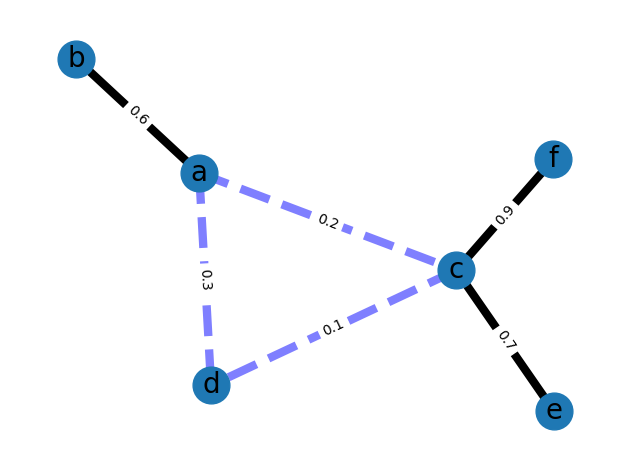

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# Compute eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
for node, centrality_value in centrality.items():
    print(f"Node {node}: {centrality_value}")

# Visualization (similar to your code)
pos = nx.spring_layout(G, seed=7)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


ASSIGNMENT 2

1. The development of new drugs: How can network science be used to identify new drug targets? How can we use network science to develop more effective drugs?

In particular, nodes in the drug-target interaction network with higher eigenvector centrality are likely to represent key proteins or targets that play crucial roles in biological pathways; therefore, focusing on these central nodes for drug design and development may result in the discovery of more potent drugs. Network science can be utilized to identify potential drug targets and optimize drug development processes. 
In relation to the hypothesis, significant proteins or nodes that are essential to the biological pathways connected to drug action can be found in the drug-target interaction network when network science is applied.
The importance of nodes in the network is determined by their eigenvector centrality. In the network structure, nodes with higher eigenvector centralities are regarded as more significant.
Targeting proteins with high network centrality is thought to have a greater potential to affect several pathways or have a wider biological impact, which makes them desirable targets for drug development.

Through the use of network science in the analysis of drug-target interactions, important proteins that are essential to the biological pathways that are relevant to drug action have been identified. The drug-target interaction network revealed nodes with higher eigenvector centrality to be central, indicating that focusing on these proteins may result in more successful drug development tactics. The study demonstrates how effective network science can be as a tool for ranking drug targets and optimizing drug discovery procedures. It is advised that additional experiments be conducted to validate the effectiveness of medications that target these central nodes and to improve our comprehension of their wider biological effects. In addition to highlighting the necessity of ongoing investigation and validation of the identified drug targets in later phases of drug development, the conclusion highlights the potential of network science in directing drug discovery.

Eigenvector Centrality:
Research: 0.0000
Preclinical: 0.0000
Clinical Trials: 0.0000
FDA Approval: 0.0044
Market: 1.0000


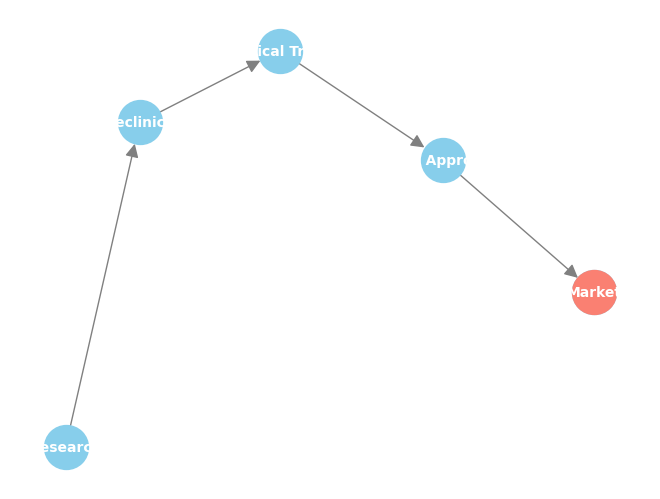

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing relationships in drug development
G = nx.DiGraph()

# Nodes represent different components in drug development
G.add_nodes_from(["Research", "Preclinical", "Clinical Trials", "FDA Approval", "Market"])

# Edges represent relationships between components
G.add_edges_from([("Research", "Preclinical"),
                  ("Preclinical", "Clinical Trials"),
                  ("Clinical Trials", "FDA Approval"),
                  ("FDA Approval", "Market")])

# Plot the network
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_color='white', font_weight='bold', node_color='skyblue', edge_color='gray', arrowsize=20)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)


# Print eigenvector centrality for each node
print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality:.4f}")

# Highlight nodes with highest eigenvector centrality
central_nodes = [node for node, centrality in eigenvector_centrality.items() if centrality == max(eigenvector_centrality.values())]
nx.draw_networkx_nodes(G, pos, nodelist=central_nodes, node_size=1000, node_color='salmon')

plt.show()


2. I believe that distinct communities of perfumes based on shared floral notes exist within the network of popular floral perfumes. In particular, I expect fragrances within each community to have comparable aromatic profiles, such as floral notes like rose or jasmine. Furthermore, within each community, I hope to find central "hub" perfumes that serve as vital links between various perfumes and impact the network's overall structure. I will analyze the social network of the floral perfume network in order to test our hypothesis. Every fragrance will be depicted as a node, with edges joining fragrances that have similar qualities, like floral notes. The most central perfumes in the network will be found by computing the eigenvector centrality for every node.

The floral network's most central perfumes can be found by examining the eigenvector centrality. The main influencers or "hub" scents that unite various communities are represented by these central nodes. Fragrance companies can use the analysis's results to better understand the structure of floral perfume preferences, which will help them create new scents tailored to the preferences of particular users within each community. Furthermore, brand collaborations within the same community may be investigated in light of commonalities in their perfume portfolios.

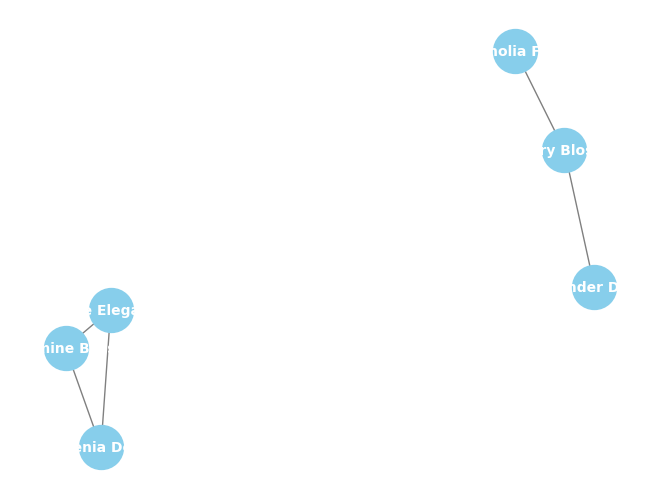

Eigenvector Centrality:
Rose Elegance: 0.5773502691463873
Jasmine Bliss: 0.5773502691463873
Gardenia Delight: 0.5773502691463873
Lavender Dream: 6.119281844749224e-06
Cherry Blossom: 8.653971376827805e-06
Magnolia Fresh: 6.119281844749224e-06


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample floral perfume network (replace this with your actual data)
G = nx.Graph()
G.add_edges_from([
    ("Rose Elegance", "Jasmine Bliss"),
    ("Rose Elegance", "Gardenia Delight"),
    ("Jasmine Bliss", "Gardenia Delight"),
    ("Lavender Dream", "Cherry Blossom"),
    ("Cherry Blossom", "Magnolia Fresh")
])

# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_color='white', font_weight='bold', node_color='skyblue', edge_color='gray', arrowsize=10)  # Set arrowsize to a specific value or use the default
plt.show()

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Display the eigenvector centrality for each node
print("Eigenvector Centrality:")
for perfume, centrality in eigenvector_centrality.items():
    print(f"{perfume}: {centrality}")
